# Inspecting the PubMed Paper Dataset

**IMPORTANT: This is not the final version! The assignments will be changed.**

This notebook's purpose is to provide a basic illustration of how to handle data in the PubMed dataset, as well as to provide some basic assignments about this dataset. Make sure you download all the dataset files (`malaria__Summaries.pkl.bz2`, etc.) from Blackboard and save them in a directory called `data`, which should be a sub-directory of the one that contains this notebook file (or adjust the file path in the code). The dataset consists of information about scientific papers from the PubMed dataset that contain the word "malaria" in the title or abstract.

Note that you can run all of this code from a normal Python or iPython shell, except for certain magic codes (marked with %) used for display within a notebook.

## Loading the dataset

In [1]:
import pickle, bz2

Summaries_file = 'data/malaria__Summaries.pkl.bz2'
Summaries = pickle.load( bz2.BZ2File( Summaries_file, 'rb' ) )

To make it easier to access the data, we convert here paper entries into [named tuples](http://docs.python.org/3/library/collections.html#collections.namedtuple). This will allow us to refer to fields by keyword, rather than index.

In [2]:
from collections import namedtuple

paper = namedtuple( 'paper', ['title', 'authors', 'year', 'doi'] )

for (id, paper_info) in Summaries.items():
    Summaries[id] = paper( *paper_info )

In [3]:
Summaries[24130474]

paper(title='A network approach to analyzing highly recombinant malaria parasite genes.', authors=['Larremore DB', 'Clauset A', 'Buckee CO'], year=2013, doi='10.1371/journal.pcbi.1003268')

In [4]:
Summaries[24130474].title

'A network approach to analyzing highly recombinant malaria parasite genes.'

## Dataset statistics

Plotting relies on [matplotlib](http://matplotlib.org/), which you can download from [here](http://matplotlib.org/downloads.html) ([NumPy](http://www.numpy.org/) is also required, and can be downloaded [here](http://sourceforge.net/projects/numpy/files/NumPy/1.10.1/)).

In [5]:
import matplotlib.pyplot as plt

# show plots inline within the notebook
%matplotlib inline
# set plots' resolution
plt.rcParams['savefig.dpi'] = 100

### Papers per year

Here, we will get information on how many papers in the dataset were published per year.

We'll be using the [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) class to determine the number of papers per year.

In [6]:
from collections import Counter

paper_years = [ p.year for p in Summaries.values() ]
papers_per_year = sorted( Counter(paper_years).items() )
print('Number of papers in the dataset per year for the past decade:')
print(papers_per_year[-10:])

Number of papers in the dataset per year for the past decade:
[(2007, 2245), (2008, 2317), (2009, 2482), (2010, 2707), (2011, 2994), (2012, 3233), (2013, 3352), (2014, 3588), (2015, 3627), (2016, 3127)]


Filtering results, to obain only papers since 1950:

In [7]:
papers_per_year = [ (y,count) for (y,count) in papers_per_year if y >= 1950 ]
years = [ y for (y,count) in papers_per_year ]
nr_papers = [ count for (y,count) in papers_per_year ]

print('Number of papers in the dataset published since 1950: %d.' % sum(nr_papers))

Number of papers in the dataset published since 1950: 64761.


Creating a bar plot to visualize the results (using [matplotlib.pyplot.bar](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar)):

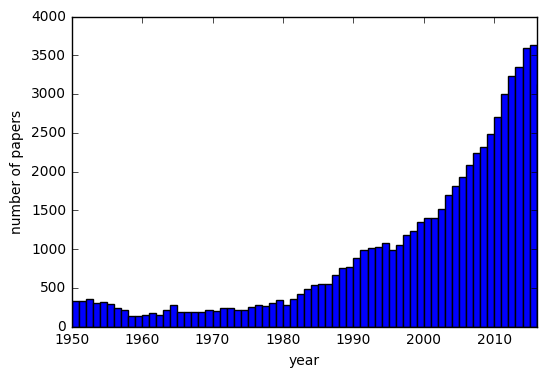

In [8]:
plt.bar( left=years, height=nr_papers, width=1.0 )
plt.xlim(1950,2016)
plt.xlabel('year')
plt.ylabel('number of papers');

### Papers per author

Here, we will obtain the distribution characterizing the number of papers published by an author.

In [9]:
# flattening out of the list of lists of authors
authors_expanded = [
    auth
    for paper in Summaries.values()
    for auth in paper.authors
    ]

nr_papers_by_author = Counter( authors_expanded )

In [10]:
print('There are %d authors in the dataset with distinct names.\n' % len(nr_papers_by_author))
print('50 authors with greatest number of papers:')
print(sorted(nr_papers_by_author.items(), key=lambda i:i[1] )[-50:])

There are 114572 authors in the dataset with distinct names.

50 authors with greatest number of papers:
[('Fontenille D', 141), ('Sharma VP', 141), ('Mercereau-Puijalon O', 141), ('Barnwell JW', 142), ('Hviid L', 142), ('Wilairatana P', 144), ('Plowe CV', 145), ('Beier JC', 146), ('Sinden RE', 147), ('Anstey NM', 150), ('Taylor TE', 152), ('Alonso PL', 153), ('Dondorp AM', 154), ('Le Bras J', 156), ('Björkman A', 158), ('Yan G', 158), ('Good MF', 160), ('Troye-Blomberg M', 161), ('Riley EM', 162), ('Davis TM', 162), ('Theander TG', 164), ('Greenwood B', 166), ('Kumar S', 167), ('Sauerwein RW', 167), ('Molyneux ME', 167), ('Trape JF', 167), ('Holder AA', 168), ('Druilhe P', 169), ('Dorsey G', 169), ('Cowman AF', 177), ('Day NP', 182), ('Kain KC', 184), ('Deloron P', 190), ('Doumbo OK', 194), ('Collins WE', 196), ('Rogier C', 202), ('Mueller I', 204), ("D'Alessandro U", 212), ('Tanner M', 220), ('Hill AV', 243), ('Rosenthal PJ', 254), ('Hoffman SL', 257), ('Miller LH', 265), ('Greenwood

Creating a histogram to visualize the results (using [matplotlib.pyplot.hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist)):

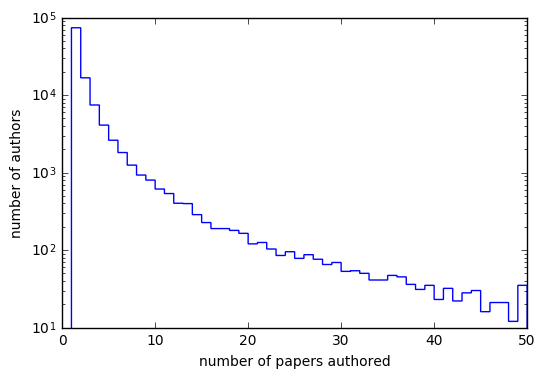

In [11]:
plt.hist( x=list(nr_papers_by_author.values()), bins=range(51), histtype='step' )
plt.yscale('log')
plt.xlabel('number of papers authored')
plt.ylabel('number of authors');

### Authors per paper

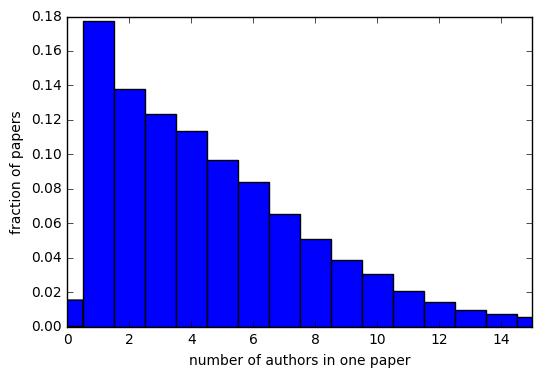

In [12]:
plt.hist( x=[ len(p.authors) for p in Summaries.values() ], bins=range(20), histtype='bar', align='left', normed=True )
plt.xlabel('number of authors in one paper')
plt.ylabel('fraction of papers')
plt.xlim(0,15);

### Most frequently occurring words in paper titles

In [13]:
# assemble list of words in paper titles, convert them to lowercase, and remove trailing '.'
title_words = Counter([
    ( word if word[-1] != '.' else word[:-1] ).lower()
    for paper in Summaries.values()
    for word in paper.title.split(' ')
    if word != ''   # discard empty strings that are generated when consecutive spaces occur in the title
    ])

In [14]:
print(len(title_words), 'distinct words occur in the paper titles.\n')
print('50 most frequently occurring words:')
print(sorted( title_words.items(), key=lambda i:i[1] )[-50:])

54122 distinct words occur in the paper titles.

50 most frequently occurring words:
[('patients', 1256), ('development', 1276), ('cells', 1310), ('mosquito', 1327), ('cell', 1340), ('chloroquine', 1428), ('among', 1431), ('cerebral', 1441), ('vaccine', 1462), ('analysis', 1472), ('drug', 1539), ('during', 1539), ('clinical', 1585), ('severe', 1614), ('is', 1657), ('parasites', 1704), ('transmission', 1790), ('malaria:', 1826), ('health', 1853), ('resistance', 1860), ('new', 1862), ('antimalarial', 1930), ('as', 1951), ('blood', 1987), ('protein', 2038), ('parasite', 2246), ('study', 2408), ('control', 2497), ('vivax', 2540), ('infection', 2541), ('human', 2595), ('against', 2604), ('children', 2786), ('treatment', 3373), ('anopheles', 3449), ('an', 3500), ('by', 4249), ('from', 4766), ('on', 6049), ('with', 8195), ('to', 9671), ('for', 10034), ('falciparum', 11001), ('plasmodium', 15338), ('a', 15466), ('the', 30238), ('and', 31298), ('malaria', 34957), ('in', 46371), ('of', 59018)]


# Assignments

**Your name:** ...

- Create a plot for the years from 1940 until 2016 that shows how many authors published at least one paper.  
  _Hint:_ use a *defaultdict* with a default value of *set*. You can retrieve the number of unique items in a set `s` with `len(s)`. See also the documentation for [*set*](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset) and [*defaultdict*](https://docs.python.org/3/library/collections.html#collections.defaultdict)

In [ ]:
# Add your code here

- Calculate and plot (e.g. using [plt.plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)) a graph of the frequency of the 100 most frequent words in titles of papers, from most frequent to least frequent.

In [ ]:
# Add your code here

- While keeping in mind that we are dealing with a biased (preselected) dataset about malaria-related papers, what do you notice when looking at the top 10 most frequent words?

[_Write your answer text here_]

In [ ]:
# Add your code here

**Submit the answers to the assignment as a modified version of this Notebook file (file with `.ipynb` extension) that includes your code and your answers via Blackboard.**